<a href="https://colab.research.google.com/github/pranayj77/Covid19-Classifier/blob/main/COVID_19_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
from tensorflow.keras.layers import *

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
import random
%matplotlib inline
# import the libraries as shown below

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/MyDrive/Medical Imaging Project/COVID-19_Radiography_Dataset'
covid_data = data_folder +'/Data/COVID/'
normal_data = data_folder +'/Data/Normal/'
viral_data = data_folder +'/Viral Pneumonia/'

cov_images = glob(covid_data+'*.png')
nor_images = glob(normal_data+'*.png')
vir_images = glob(viral_data+'*.png')


In [ ]:
data = data_folder+'/Data/';
print(data)

/content/drive/MyDrive/Medical Imaging Project/COVID-19_Radiography_Dataset/Data/


<function matplotlib.pyplot.show>

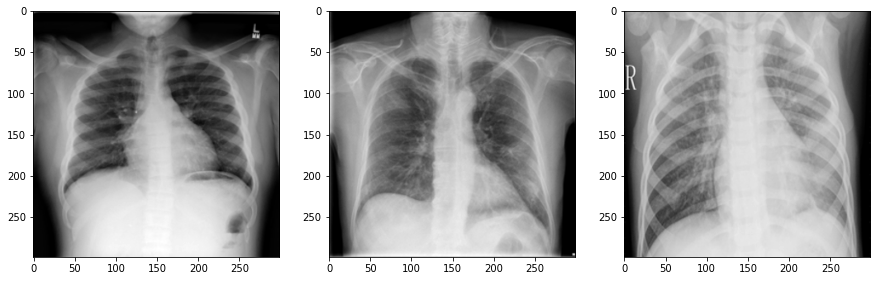

In [ ]:
cov_im = np.asarray(plt.imread(cov_images[random.randint(1,len(cov_images))]))
nor_im = np.asarray(plt.imread(nor_images[random.randint(1,len(nor_images))]))
vir_im = np.asarray(plt.imread(vir_images[random.randint(1,len(vir_images))]))

fig = plt.figure(figsize = (15,10))
nor_plt = fig.add_subplot(1,3,1)
plt.imshow(nor_im, cmap = 'gray')

cov_plt = fig.add_subplot(1,3,2)
plt.imshow(cov_im, cmap = 'gray')

vir_plt = fig.add_subplot(1,3,3)
plt.imshow(vir_im, cmap = 'gray')

plt.show

In [ ]:
img_size = list(np.shape(cov_im))
print(img_size+[3])

[299, 299, 3]


In [ ]:
res = ResNet50(classes=2,include_top=False,input_shape = tuple([255,255,3]),weights='imagenet')


In [ ]:
for layer in res.layers:
    layer.trainable = False

In [ ]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 261, 261, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
print(res.output)
x = Flatten()(res.output)
prediction = Dense(2, activation='softmax')(x)

mod = Model(inputs=res.input, outputs=prediction)



KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data, # same directory as training data
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data




Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.


In [ ]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator2 = train_datagen2.flow_from_directory(
    data,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator2 = train_datagen2.flow_from_directory(
    data, # same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data




Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.


In [ ]:
mod.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','Precision','Recall']
)

In [ ]:
mod.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 261, 261, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:

# fit the model
# Run the cell. It will take some time to execute
r = mod.fit(
  train_generator2,
  validation_data=validation_generator2,
  epochs=20,
)

Epoch 1/20
346/346 [==============================] - 313s 791ms/step - loss: 1.0661 - accuracy: 0.7457 - precision: 0.7457 - recall: 0.7457 - val_loss: 0.4816 - val_accuracy: 0.7914 - val_precision: 0.7914 - val_recall: 0.7914
Epoch 2/20
346/346 [==============================] - 269s 778ms/step - loss: 0.6685 - accuracy: 0.7569 - precision: 0.7569 - recall: 0.7569 - val_loss: 0.4211 - val_accuracy: 0.8251 - val_precision: 0.8251 - val_recall: 0.8251
Epoch 3/20
346/346 [==============================] - 267s 772ms/step - loss: 0.9595 - accuracy: 0.7334 - precision: 0.7334 - recall: 0.7334 - val_loss: 0.3852 - val_accuracy: 0.8348 - val_precision: 0.8348 - val_recall: 0.8348
Epoch 4/20
346/346 [==============================] - 267s 772ms/step - loss: 0.7116 - accuracy: 0.7679 - precision: 0.7679 - recall: 0.7679 - val_loss: 0.3513 - val_accuracy: 0.8464 - val_precision: 0.8464 - val_recall: 0.8464
Epoch 5/20
346/346 [==============================] - 266s 769ms/step - loss: 0.7890 - a

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig, ax = plt.subplots(1,2,figsize=(20,10))
  ax[0].plot(epochRange,history.history['accuracy'],'b',label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],'r',label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize = 20)
  ax[0].set_ylabel('Accuracy', fontsize = 20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')
  ax[1].plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize = 20)
  ax[1].set_ylabel('Loss', fontsize = 20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
  plt.show()

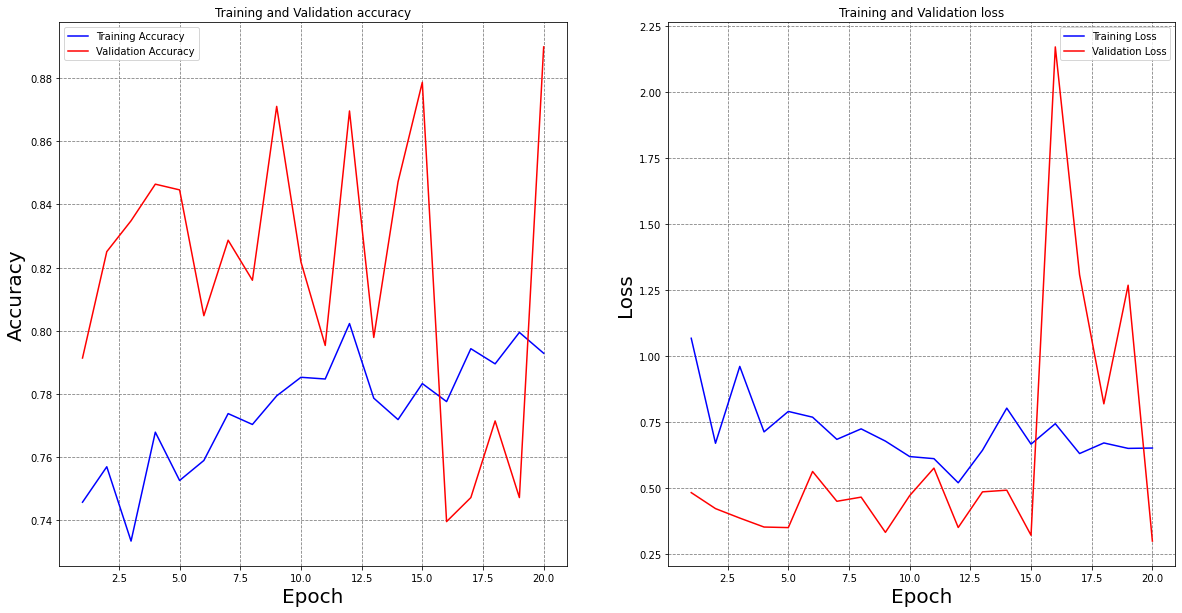

In [ ]:
plotLearningCurve(r,20)

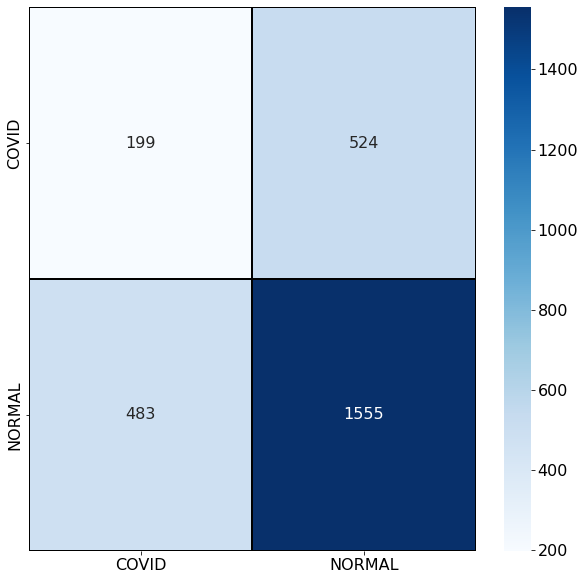

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 16})
predictions = mod.predict(validation_generator2)
predictions = np.argmax(predictions,axis=1)
predictions[:15]
cm = confusion_matrix(validation_generator2.classes, predictions)
cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
cm
class_names = ['COVID','NORMAL']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

In [ ]:
r2 = mod.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=10,
  epochs=5,
  validation_steps=16
)

Epoch 1/5
10/10 [==============================] - 81s 9s/step - loss: 0.5682 - accuracy: 0.7344 - precision: 0.7344 - recall: 0.7344 - val_loss: 0.5295 - val_accuracy: 0.7381 - val_precision: 0.7381 - val_recall: 0.7381
Epoch 2/5
10/10 [==============================] - 81s 9s/step - loss: 0.5803 - accuracy: 0.7250 - precision: 0.7250 - recall: 0.7250 - val_loss: 0.5316 - val_accuracy: 0.7381 - val_precision: 0.7381 - val_recall: 0.7381
Epoch 3/5
10/10 [==============================] - 82s 9s/step - loss: 0.5065 - accuracy: 0.7688 - precision: 0.7688 - recall: 0.7688 - val_loss: 0.5521 - val_accuracy: 0.7381 - val_precision: 0.7381 - val_recall: 0.7381
Epoch 4/5
10/10 [==============================] - 82s 9s/step - loss: 0.5765 - accuracy: 0.7250 - precision: 0.7250 - recall: 0.7250 - val_loss: 0.5420 - val_accuracy: 0.7381 - val_precision: 0.7381 - val_recall: 0.7381
Epoch 5/5
10/10 [==============================] - 83s 9s/step - loss: 0.5391 - accuracy: 0.7594 - precision: 0.7594

In [ ]:
mod.save('/content/drive/MyDrive/Medical Imaging Project/model3/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Medical Imaging Project/model3/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b

https://github.com/beingnitisho7/LungsDiseasePredictionCNN_VGG_ResNet/blob/master/Xray_resnet.ipynb



https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8095476/

In [ ]:
mod5 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Medical Imaging Project/model3/')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Medical Imaging Project/model3/', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]